In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NBA_Player_data_comprehensive.csv')
df.head()

,Player,Tm,Salary,Signed Using,Guaranteed,Pos,Age,G,GS,MP,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,GSW,43006362,Bird Rights,$88787328,PG,32.0,40.0,40.0,33.7,...,11.7,32.6,3.8,1.5,5.3,0.189,7.3,0.2,7.5,3.2
1,Russell Westbrook,WAS,41358814,Bird Rights,$85569960,PG,32.0,38.0,38.0,34.9,...,18.5,31.7,-0.6,1.6,0.9,0.032,1.7,0.0,1.7,1.3
2,Chris Paul,PHO,41358814,Bird Rights,$41358814,PG,35.0,44.0,44.0,31.9,...,14.7,22.3,3.4,2.1,5.5,0.183,2.3,1.3,3.6,2.0
3,John Wall,HOU,41254920,Bird Rights,$85565760,PG,30.0,32.0,32.0,31.8,...,14.3,31.6,-0.7,0.9,0.2,0.008,1.3,-1.7,-0.4,0.4
4,James Harden,BRK,40824000,Bird Rights,$84672000,PG-SG,31.0,40.0,40.0,38.2,...,16.7,28.9,5.1,1.6,6.7,0.210,6.2,0.4,6.6,3.3


In [3]:
df.Tm.value_counts()

SAC    17
HOU    16
WAS    16
BRK    16
NYK    15
UTA    15
PHO    15
OKC    15
IND    15
CHI    15
CHO    15
BOS    14
TOR    14
DAL    14
CLE    14
SAS    14
DET    14
MEM    14
MIN    14
ATL    13
LAL    13
NOP    13
MIL    12
ORL    12
GSW    12
PHI    12
DEN    12
POR    12
MIA    11
LAC    11
Name: Tm, dtype: int64

In [4]:
def get_team_allocations(df):
    smalls = df[(df['Pos']=='PG') | (df['Pos']=='SG') | (df['Pos']=='SF')].Salary.sum()
    bigs = df[(df['Pos']=='PF') | (df['Pos']=='C')].Salary.sum()
    total_salaries = smalls + bigs
    guards_perc = smalls/total_salaries*100
    return smalls, bigs, guards_perc

In [5]:
grouped = df.groupby(by=['Tm'])
team_numbers_series = grouped.apply(get_team_allocations)
team_numbers_frame = team_numbers_series.to_frame()
team_numbers_frame.columns = ['Raw_tuple']
team_numbers_frame['Small_salary'], team_numbers_frame['Big_salary'], team_numbers_frame['Small_perc'] = team_numbers_frame.Raw_tuple.str
team_df = team_numbers_frame.reset_index()
final_team_df = team_df.drop(columns=['Raw_tuple'])
final_team_df

/Users/reecekoe/opt/anaconda3/envs/global/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """


,Tm,Small_salary,Big_salary,Small_perc
0,ATL,53093884,49143241,51.932098
1,BOS,104725900,20006428,83.960511
2,BRK,69061069,87466598,44.120679
3,CHI,52373301,75594788,40.926845
4,CHO,69053451,28055243,71.109443
5,CLE,31000960,93680645,24.864101
6,DAL,46769430,63500546,42.413567
7,DEN,52007661,69214523,42.902759
8,DET,60665732,16453347,78.665011
9,GSW,65045463,68376597,48.751655


In [6]:
record = pd.read_csv('team_record_comprehensive.csv', encoding = 'utf-8')

In [7]:
merged_df = record.merge(final_team_df, left_on='Team_abb', right_on='Tm')
merged_df.columns
team_allocation_df = merged_df.drop(columns=['Team', 'Tm'])
team_allocation_df

,Unnamed: 0,Rk,Team_abb,Overall,Wins,Losses,Win%,Class,Small_salary,Big_salary,Small_perc
0,0,1,UTA,35-11,35,11,0.760870,Big,92653689,39543838,70.087309
1,1,2,BRK,32-15,32,15,0.680851,Big,69061069,87466598,44.120679
2,2,3,LAC,32-17,32,17,0.653061,Big,103894479,28854799,78.263687
3,3,4,PHI,32-15,32,15,0.680851,Big,61982626,70629354,46.739839
4,4,5,PHO,32-14,32,14,0.695652,Small,88466199,37973280,69.967228
5,5,6,LAL,30-17,30,17,0.638298,Small,80008540,49461099,61.797145
6,6,7,DEN,29-18,29,18,0.617021,Big,52007661,69214523,42.902759
7,7,8,MIL,29-17,29,17,0.630435,Big,73000625,51818302,58.485221
8,8,9,POR,28-18,28,18,0.608696,Small,84265700,35597942,70.301301
9,9,10,CHO,24-22,24,22,0.521739,Big,69053451,28055243,71.109443


In [8]:
team_allocation_df['Win%'] = team_allocation_df['Win%'] * 100
team_allocation_df

,Unnamed: 0,Rk,Team_abb,Overall,Wins,Losses,Win%,Class,Small_salary,Big_salary,Small_perc
0,0,1,UTA,35-11,35,11,76.086957,Big,92653689,39543838,70.087309
1,1,2,BRK,32-15,32,15,68.085106,Big,69061069,87466598,44.120679
2,2,3,LAC,32-17,32,17,65.306122,Big,103894479,28854799,78.263687
3,3,4,PHI,32-15,32,15,68.085106,Big,61982626,70629354,46.739839
4,4,5,PHO,32-14,32,14,69.565217,Small,88466199,37973280,69.967228
5,5,6,LAL,30-17,30,17,63.829787,Small,80008540,49461099,61.797145
6,6,7,DEN,29-18,29,18,61.702128,Big,52007661,69214523,42.902759
7,7,8,MIL,29-17,29,17,63.043478,Big,73000625,51818302,58.485221
8,8,9,POR,28-18,28,18,60.869565,Small,84265700,35597942,70.301301
9,9,10,CHO,24-22,24,22,52.173913,Big,69053451,28055243,71.109443


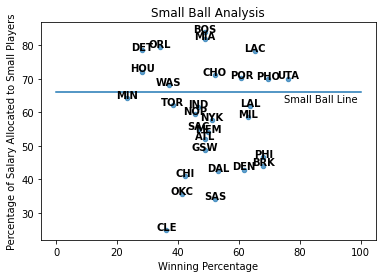

In [24]:
team_allocation_df.plot(x='Win%', y='Small_perc',kind='scatter', s=20, alpha=0.7)
x = np.linspace(0, 100, 100)
y = [66]*100
plt.plot(x,y)
plt.xlabel('Winning Percentage')
plt.ylabel('Percentage of Salary Allocated to Small Players')
plt.title('Small Ball Analysis')
plt.text(75,63,'Small Ball Line')

for line in range(0,30):
     plt.text(team_allocation_df.iloc[line,6], team_allocation_df.iloc[line,10], team_allocation_df.iloc[line,2], horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.savefig('small_ball.png')